In [1]:
import pickle
import matplotlib.pylab as pl
import numpy as np

# function

In [2]:
def plot_mcc(result, labels=None, mean=1, i=0, title='', ymax=0.65, fig_title='', show_maxiter=True):
    '''
    Plot MCC (Matthews Correlation Coefficient) performance curves.
    
    Parameters
    ----------
    result : list
        List containing performance results
    labels : list, optional
        Custom labels for individual repeats
    mean : int
        Plot type: 2=all repeats, 1=average, 0=single repeat
    i : int
        Which repeat to plot when mean=0 
    title : str, optional
        Plot title
    ymax : float, default=0.65
        Maximum y-axis limit
    fig_title : str, optional
        Title for the entire figure
    show_maxiter : bool, default=True
        Whether to show the maximum iteration lines and text
    '''
    fig, ax = pl.subplots()
    ax.set_ylim([0, ymax])

    if mean == 1:
        # Plot average performance
        print('Plotting average performance')
        ax.plot(np.mean(result[0], axis=0), '#1f77b4', label='Average Performance')
        
    elif mean == 2:
        # Plot all individual repeats
        print('Plotting all individual repeats')
        colors = pl.rcParams['axes.prop_cycle'].by_key()['color']
        lines = []
        for idx in range(len(result[0])):
            maxiter = np.argmax(result[0][idx])
            label = labels[idx] if labels else f'Repeat {idx+1}'
            line = ax.plot(result[0][idx], color=colors[idx], linewidth=0.5, label=label)
            if show_maxiter:
                ax.plot([maxiter, maxiter], [0.0, ymax], '--', color=colors[idx], linewidth=1)
            lines.extend(line)
            
        # Create legend with adjusted position based on number of labels
        legend_y = -0.35 if len(result[0]) <= 4 else -0.45
        ax.legend(handles=lines, loc='lower center', bbox_to_anchor=(0.5, legend_y),
                 ncol=2, frameon=True, fancybox=True)
        if title:
            ax.set_title(title)
        pl.subplots_adjust(bottom=0.3 if len(result[0]) > 4 else 0.2)  # Adjust bottom margin
        
    else:
        # Plot single repeat
        print(f'Plotting repeat {i}')
        maxiter = np.argmax(result[0][i])
        ax.plot(result[0][i], '#1f77b4', label=f'Repeat {i+1}')
        if show_maxiter:
            ax.plot([maxiter, maxiter], [0.0, ymax], '--', color='#ff7f0e', label='Max Performance')
            ax.text(maxiter + 10, 0.0, "maxIter")

    # Common settings
    ax.set_xlabel("Active Learning Iteration")
    ax.set_ylabel("Test Set Performance [MCC]")
    if mean != 2:
        ax.legend(loc='upper right')
    
    if fig_title:
        fig.suptitle(fig_title, y=0.93)


# results

In [3]:
result_folder = '../output/active_learning/'

## test on metaqsar test (1)

### train from model

#### active learning set: AZ SoM_exact (2)

Plotting all individual repeats


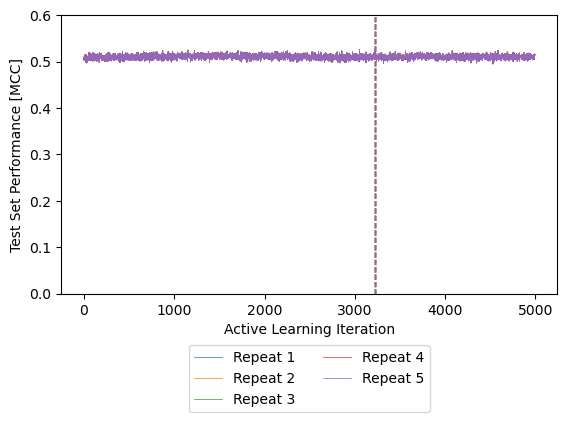

In [4]:
result_name = result_folder + \
'metaqsar_azpublic_explicit_al_input_3folds_result_0.3_TH_AL_Fold1_5repeats_fromFAME.pickle'

with open(result_name, 'rb') as f:
    result_explicit_from_model = pickle.load(f)


plot_mcc(result_explicit_from_model,mean=2,ymax=0.6)

#### active learning set: AZ SoM_extended (2)

Plotting all individual repeats


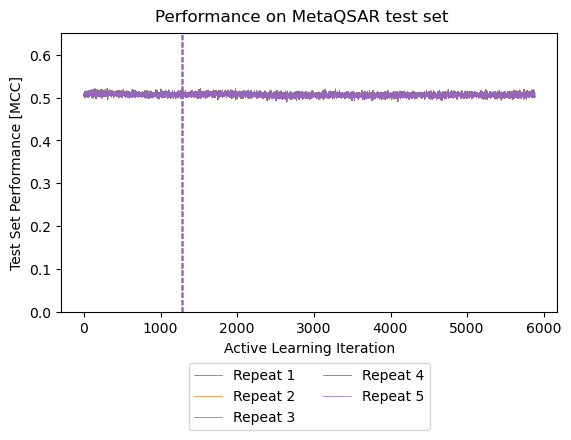

In [5]:
result_name = result_folder + \
'metaqsar_azpublic_all_al_input_3folds_result_0.3_TH_AL_Fold1_5repeats_fromFAME.pickle'

with open(result_name, 'rb') as f:
    result_all_from_model = pickle.load(f)


plot_mcc(result_all_from_model,mean=2,fig_title='Performance on MetaQSAR test set')

#### compare

Plotting all individual repeats


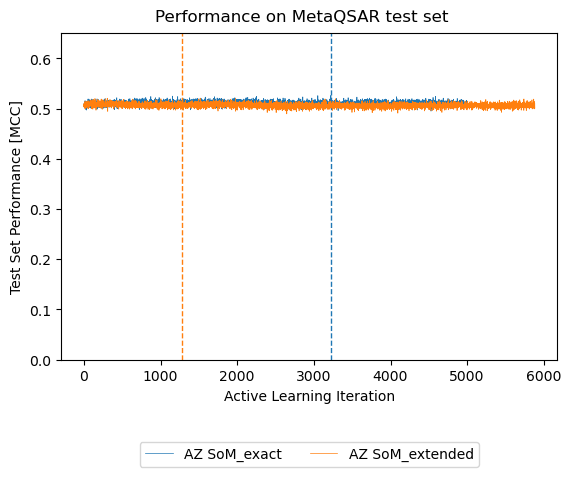

In [6]:
# take all one repeat
result_compare_fromModel = ([],[],[],[])
for result in [result_explicit_from_model,result_all_from_model]:
    for i in range(4):
        result_compare_fromModel[i].append(result[i][0])

labels = ['AZ SoM_exact','AZ SoM_extended']

plot_mcc(result_compare_fromModel,labels,mean=2,fig_title='Performance on MetaQSAR test set')

### train from scatch

#### training: metaqsar train (0)

Plotting all individual repeats


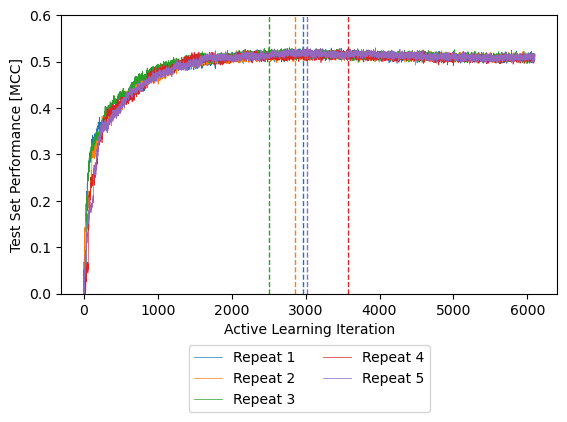

In [7]:
result_name = result_folder + \
'metaqsar_test_metaqsar_al_input_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_metaqsar_batch_5 = pickle.load(f)


plot_mcc(result_metaqsar_batch_5,mean=2,ymax=0.6)

#### training: AZ explicit (2)

Plotting all individual repeats


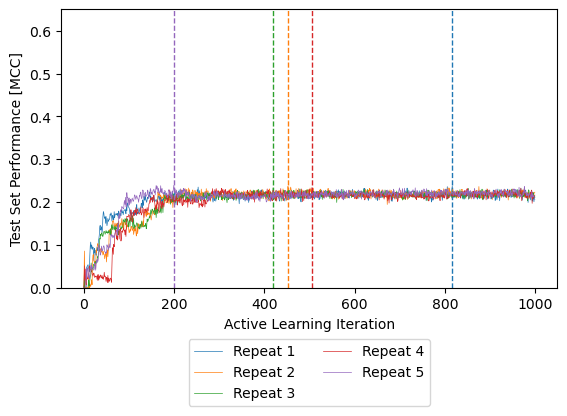

In [8]:
result_name = result_folder + \
'azpublic_explicit_test_metaqsar_al_input_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_azexplicit_batch5 = pickle.load(f)


plot_mcc(result_azexplicit_batch5, mean=2)

#### training: AZ all (2)

Plotting all individual repeats


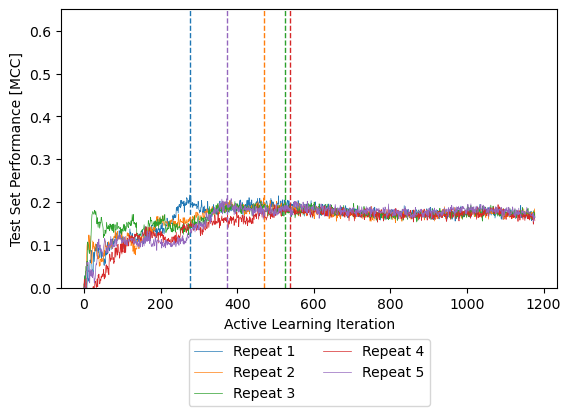

In [9]:
result_name = result_folder + \
'azpublic_all_al_input_3folds_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_azall_batch5 = pickle.load(f)


plot_mcc(result_azall_batch5, mean=2)

#### training: metaqsar train (0) + az public all (2)

Plotting all individual repeats


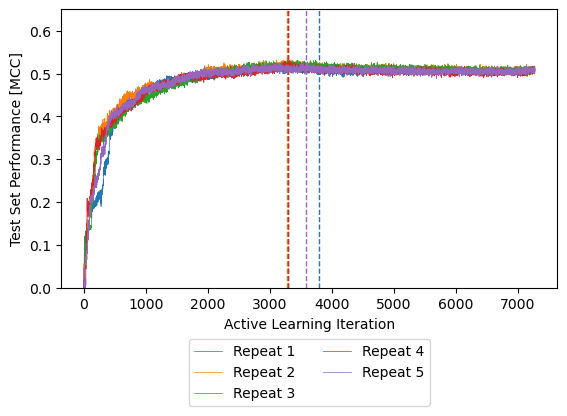

In [10]:
result_name = result_folder + \
'metaqsar_azpublic_all_al_input_3folds_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_metaqsar_azall = pickle.load(f)


plot_mcc(result_metaqsar_azall,mean=2)

#### training: metaqsar train (0) + az public explicit (2)

Plotting all individual repeats


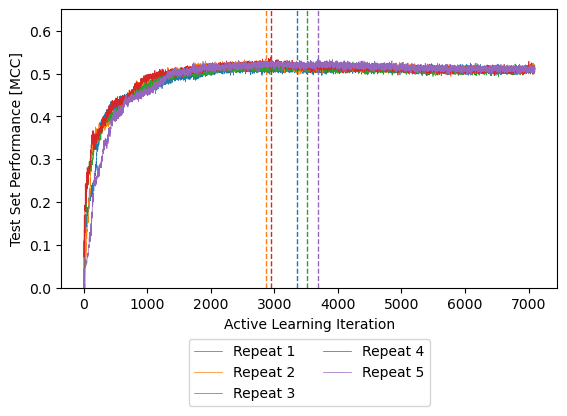

In [11]:
result_name = result_folder + \
'metaqsar_azpublic_explicit_al_input_3folds_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_metaqsar_azexplicit = pickle.load(f)


plot_mcc(result_metaqsar_azexplicit,mean=2)

#### compare

Plotting all individual repeats


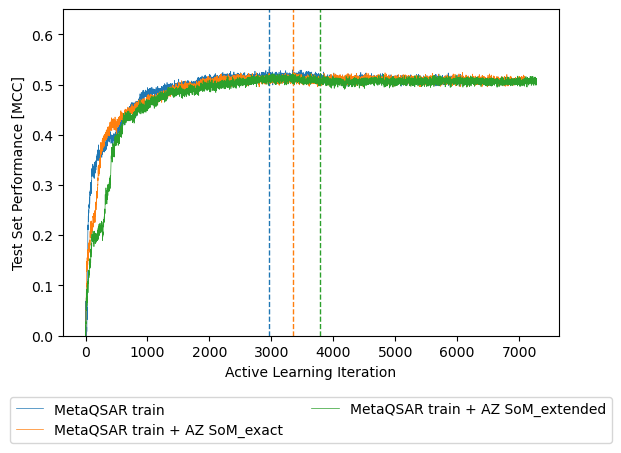

In [12]:
# take all one repeat
result_compare = ([],[],[],[])
for result in [result_metaqsar_batch_5,result_metaqsar_azexplicit,result_metaqsar_azall]:
    for i in range(4):
        result_compare[i].append(result[i][0])

labels = ['MetaQSAR train','MetaQSAR train + AZ SoM_exact','MetaQSAR train + AZ SoM_extended']

plot_mcc(result_compare,labels,mean=2)

Plotting all individual repeats


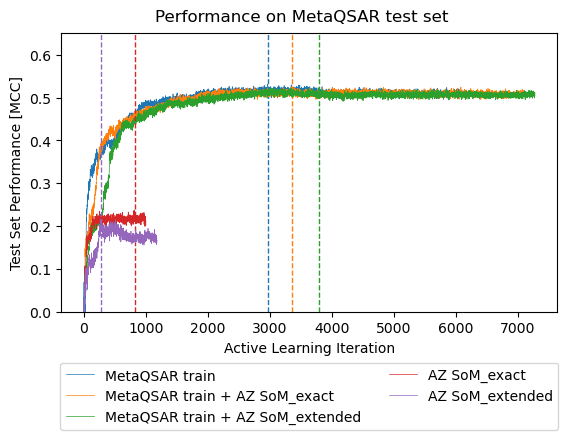

In [13]:
# take all one repeat, batch size 5
result_compare_settingB = ([],[],[],[])
for result in [result_metaqsar_batch_5,result_metaqsar_azexplicit,result_metaqsar_azall,result_azexplicit_batch5,result_azall_batch5]:
    for i in range(4):
        result_compare_settingB[i].append(result[i][0])

labels = ['MetaQSAR train','MetaQSAR train + AZ SoM_exact','MetaQSAR train + AZ SoM_extended', 'AZ SoM_exact','AZ SoM_extended']

plot_mcc(result_compare_settingB,labels,mean=2,fig_title='Performance on MetaQSAR test set')

## test on AZ SoM_exact time split test (1)

#### trained on AZ SoM_exact time split train (2)

Plotting all individual repeats


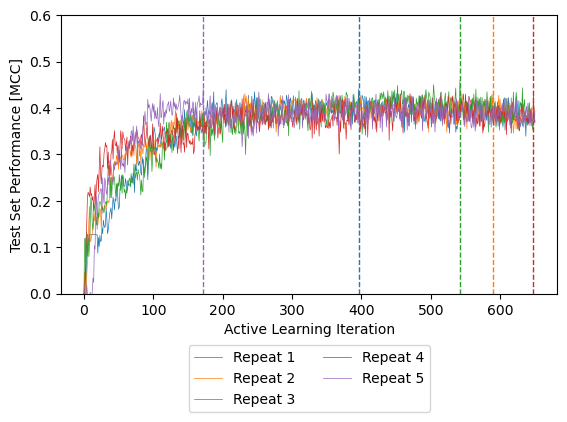

In [14]:
result_name = result_folder + \
'az_exact_timeSplit_train_test_exact_timeSplit_al_input_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_az_timeSplit_batch5 = pickle.load(f)


plot_mcc(result_az_timeSplit_batch5,mean=2,ymax=0.6)

#### trained on metaqsar train (0)

Plotting all individual repeats


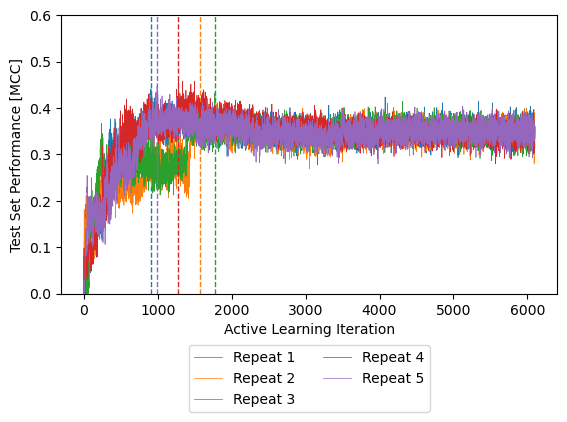

In [15]:
result_name = result_folder + \
'metaqsar_train_train_test_exact_timeSplit_al_input_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_metaqsar_timeSplit = pickle.load(f)


plot_mcc(result_metaqsar_timeSplit,mean=2,ymax=0.6)

#### trained on metaqsar train (0) + AZ SoM_exact time split train (2)

Plotting all individual repeats


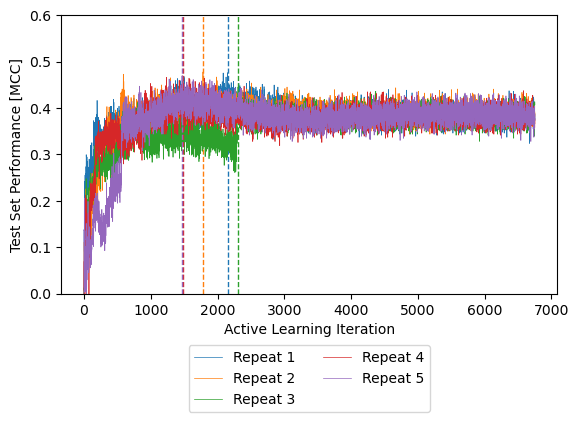

In [16]:
result_name = result_folder + \
'metaqsar_train_az_exact_timeSplit_train_test_exact_timeSplit_al_input_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_metaqsar_az_timeSplit = pickle.load(f)


plot_mcc(result_metaqsar_az_timeSplit,mean=2,ymax=0.6)

#### compare

Plotting all individual repeats


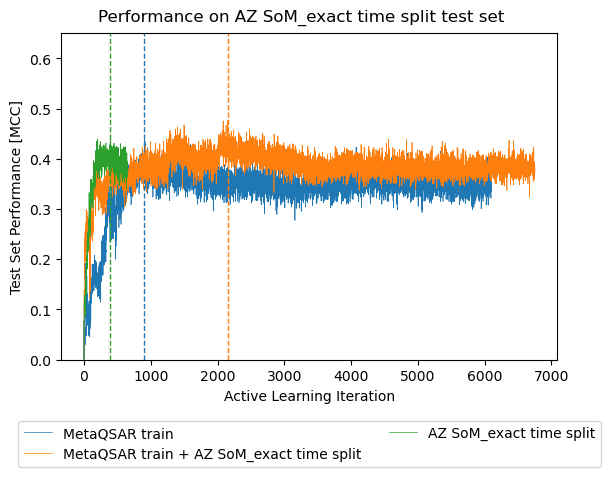

In [17]:
# take the first split of all
result_compare_timeSplit = ([],[],[],[])
for result in [result_metaqsar_timeSplit,result_metaqsar_az_timeSplit,result_az_timeSplit_batch5]:
    for i in range(4):
        result_compare_timeSplit[i].append(result[i][0])

labels = ['MetaQSAR train','MetaQSAR train + AZ SoM_exact time split','AZ SoM_exact time split']

plot_mcc(result_compare_timeSplit,labels,mean=2,fig_title='Performance on AZ SoM_exact time split test set')

## test on az public exact random split (1)

### metaqsar train (0)

Plotting all individual repeats


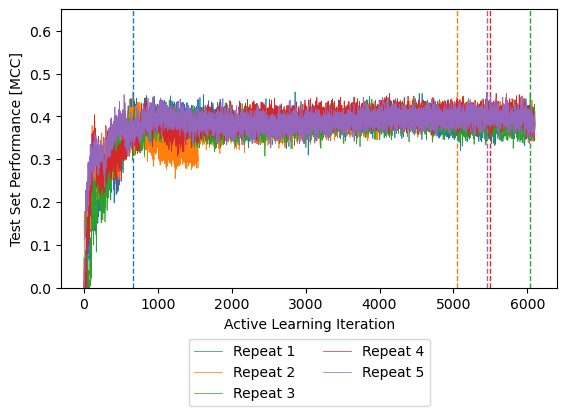

In [18]:
result_name = result_folder + \
'metaqsar_train_train_test_exact_random_mol_al_input_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_metaqsar_random_split_test_batch5 = pickle.load(f)


plot_mcc(result_metaqsar_random_split_test_batch5,mean=2)

### AZ SoM_exact random split train set(2)


Plotting all individual repeats


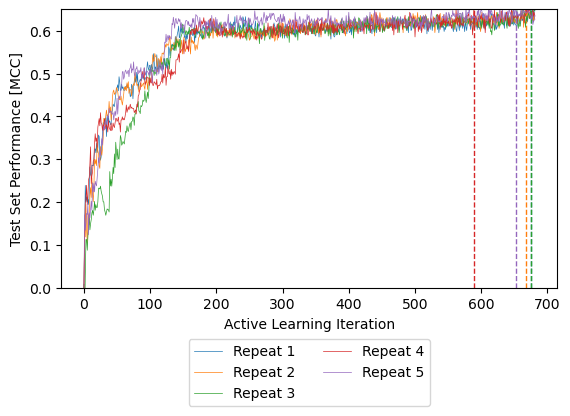

In [19]:
result_name = result_folder + \
'az_exact_random_mol_train_train_test_exact_random_mol_al_input_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_explicit_split_batch5 = pickle.load(f)


plot_mcc(result_explicit_split_batch5,mean=2)
# batch size of 1 already not stable in the early stage

### metaqsar train (0) + AZ SoM_exact random split train set(2)

Plotting all individual repeats


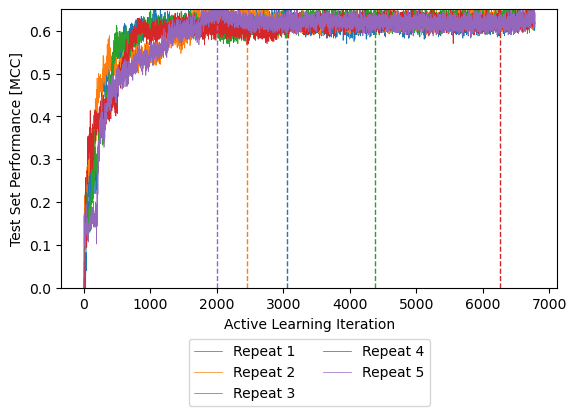

In [20]:
result_name = result_folder + \
'metaqsar_train_az_exact_random_mol_train_test_exact_random_mol_al_input_result_0.3_TH_AL_mini_batch_5_samples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_metaqsar_explicit_test_batch5 = pickle.load(f)


plot_mcc(result_metaqsar_explicit_test_batch5,mean=2)

### compare

Plotting all individual repeats


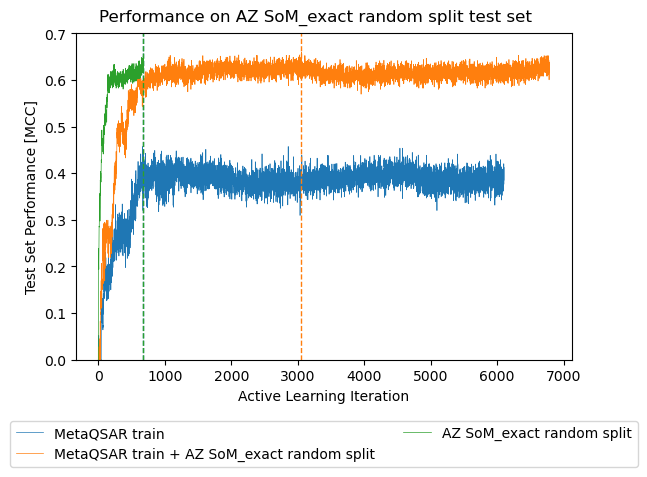

In [21]:
# take one repeat, batch 5
result_explicit_test_compare_batch5 = ([],[],[],[])
for result in [result_metaqsar_random_split_test_batch5, result_metaqsar_explicit_test_batch5,result_explicit_split_batch5]:
    for i in range(4):
        result_explicit_test_compare_batch5[i].append(result[i][0])

labels = ['MetaQSAR train','MetaQSAR train + AZ SoM_exact random split','AZ SoM_exact random split']

plot_mcc(result_explicit_test_compare_batch5,labels,mean=2,fig_title='Performance on AZ SoM_exact random split test set',ymax=0.7)

In [22]:
# Find the position (index) of the maximum value in the array
for i in range(4):
    max_value = max(result_explicit_split_batch5[0][i])
    max_index = result_explicit_split_batch5[0][i].index(max_value)
    relative_position = max_index / len(result_explicit_split_batch5[0][i])
    print(f"Maximum value: {max_value} at position: {max_index}")
    print(f"Relative position: {relative_position:.4f} (position / total length)")

Maximum value: 0.6508789000020268 at position: 675
Relative position: 0.9897 (position / total length)
Maximum value: 0.6500859741026411 at position: 667
Relative position: 0.9780 (position / total length)
Maximum value: 0.6535837976054945 at position: 675
Relative position: 0.9897 (position / total length)
Maximum value: 0.6584691153339288 at position: 589
Relative position: 0.8636 (position / total length)


In [23]:
# Check each repeat to find when MCC reaches 0.6
for repeat_idx, repeat_data in enumerate(result_explicit_split_batch5[0]):
    # Find the first iteration where MCC >= 0.6 for 10 consecutive times
    for iter_idx in range(len(repeat_data) - 9):
        if all(mcc_value >= 0.6 for mcc_value in repeat_data[iter_idx:iter_idx+10]):
            relative_position = iter_idx / len(repeat_data)
            print(f"Repeat {repeat_idx+1}: MCC value >= 0.6 for 10 consecutive iterations starting at iteration {iter_idx+1}")
            print(f"Relative position: {relative_position:.4f} (position / total length)")
            break
    else:
        print(f"Repeat {repeat_idx+1}: MCC value never reached 0.6 for 10 consecutive iterations")

Repeat 1: MCC value >= 0.6 for 10 consecutive iterations starting at iteration 237
Relative position: 0.3460 (position / total length)
Repeat 2: MCC value >= 0.6 for 10 consecutive iterations starting at iteration 360
Relative position: 0.5264 (position / total length)
Repeat 3: MCC value >= 0.6 for 10 consecutive iterations starting at iteration 354
Relative position: 0.5176 (position / total length)
Repeat 4: MCC value >= 0.6 for 10 consecutive iterations starting at iteration 174
Relative position: 0.2537 (position / total length)
Repeat 5: MCC value >= 0.6 for 10 consecutive iterations starting at iteration 134
Relative position: 0.1950 (position / total length)


# combine figures

/tmp/ipykernel_140029/375485070.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


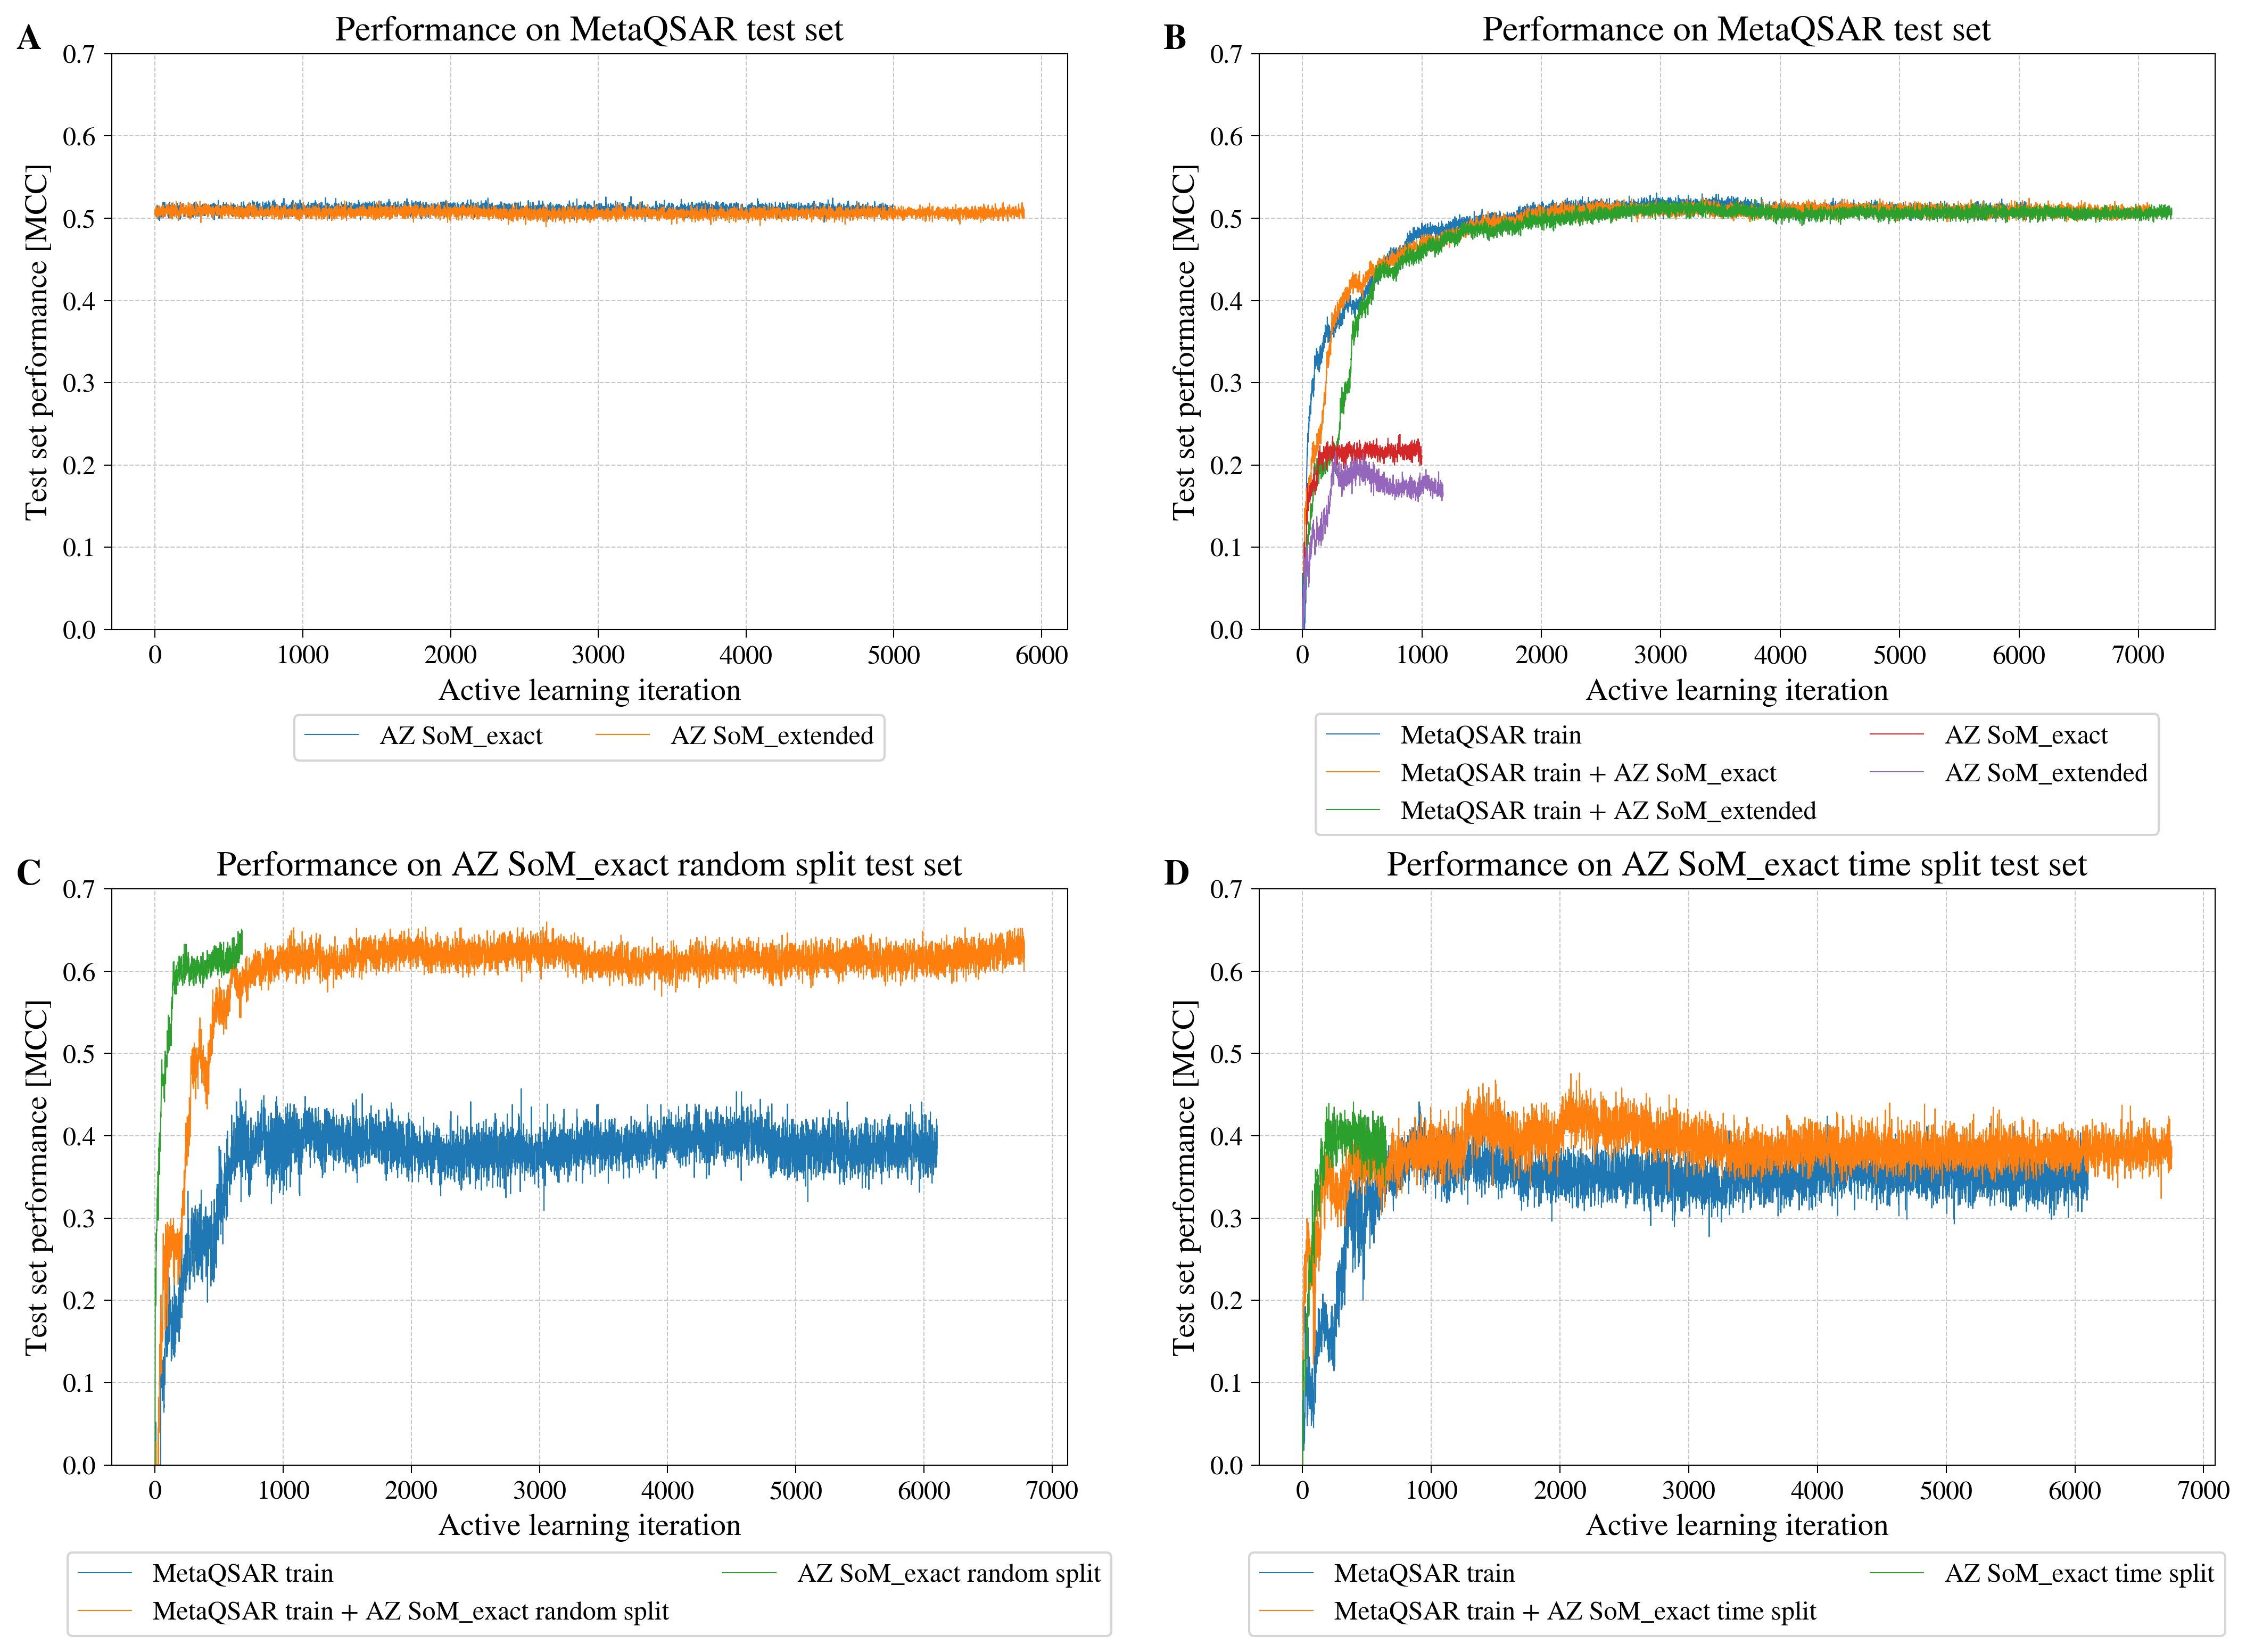

In [24]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a figure with 2x2 subplots
plt.rcParams['font.family'] = 'STIXGeneral'
fig = plt.figure(figsize=(17, 13),dpi=300)
gs = GridSpec(2, 2, figure=fig, hspace=0.45)  # Added hspace parameter to increase vertical spacing

# Set consistent font sizes for all plots
TITLE_SIZE = 16
AXIS_LABEL_SIZE = 14
TICK_LABEL_SIZE = 12
LEGEND_FONT_SIZE = 12
SUBPLOT_LABEL_SIZE = 16  # For A, B, C, D labels

# Apply font sizes to all future plots
plt.rc('font', size=TICK_LABEL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=TITLE_SIZE)          # fontsize of the axes title
plt.rc('axes', labelsize=AXIS_LABEL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_LABEL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_LABEL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)   # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE)        # fontsize of the figure title


# Plot 1: Performance on MetaQSAR test set (AZ SoM_exact vs AZ SoM_extended)
ax1 = fig.add_subplot(gs[0, 0])
# Add 'A' label outside the plot in the upper left
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')
labels = ['AZ SoM_exact','AZ SoM_extended']
ax1.set_ylim([0, 0.7])
colors = pl.rcParams['axes.prop_cycle'].by_key()['color']
lines = []
for idx in range(len(result_compare_fromModel[0])):
    label = labels[idx] if labels else f'Repeat {idx+1}'
    line = ax1.plot(result_compare_fromModel[0][idx], color=colors[idx], linewidth=0.5, label=label)
    lines.extend(line)
legend_y = -0.25
ax1.legend(handles=lines, loc='lower center', bbox_to_anchor=(0.5, legend_y),
         ncol=2, frameon=True, fancybox=True)
ax1.set_title('Performance on MetaQSAR test set')
ax1.set_xlabel("Active learning iteration")
ax1.set_ylabel("Test set performance [MCC]")
# Make the spines (frame lines) thinner
for spine in ax1.spines.values():
    spine.set_linewidth(0.5)
# Add grid lines
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
pl.subplots_adjust(bottom=0.4)

# Plot 2: Performance on MetaQSAR test set (all models)
ax2 = fig.add_subplot(gs[0, 1])
# Add 'B' label outside the plot in the upper left
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top')
labels = ['MetaQSAR train','MetaQSAR train + AZ SoM_exact','MetaQSAR train + AZ SoM_extended', 'AZ SoM_exact','AZ SoM_extended']
ax2.set_ylim([0, 0.7])
colors = pl.rcParams['axes.prop_cycle'].by_key()['color']
lines = []
for idx in range(len(result_compare_settingB[0])):
    label = labels[idx] if labels else f'Repeat {idx+1}'
    line = ax2.plot(result_compare_settingB[0][idx], color=colors[idx], linewidth=0.5, label=label)
    lines.extend(line)
legend_y = -0.38  # Increased negative value to move legend lower
ax2.legend(handles=lines, loc='lower center', bbox_to_anchor=(0.5, legend_y),
         ncol=2, frameon=True, fancybox=True)
ax2.set_title('Performance on MetaQSAR test set')
ax2.set_xlabel("Active learning iteration")
ax2.set_ylabel("Test set performance [MCC]")
# Make the spines (frame lines) thinner
for spine in ax2.spines.values():
    spine.set_linewidth(0.5)
# Add grid lines
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
pl.subplots_adjust(bottom=0.4)

# Plot 3: Performance on AZ SoM_exact random split test set
ax3 = fig.add_subplot(gs[1, 0])
# Add 'C' label outside the plot in the upper left
ax3.text(-0.1, 1.05, 'C', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top')
labels = ['MetaQSAR train','MetaQSAR train + AZ SoM_exact random split','AZ SoM_exact random split']
ax3.set_ylim([0, 0.7])
colors = pl.rcParams['axes.prop_cycle'].by_key()['color']
lines = []
for idx in range(len(result_explicit_test_compare_batch5[0])):
    label = labels[idx] if labels else f'Repeat {idx+1}'
    line = ax3.plot(result_explicit_test_compare_batch5[0][idx], color=colors[idx], linewidth=0.5, label=label)
    lines.extend(line)
legend_y = -0.32
ax3.legend(handles=lines, loc='lower center', bbox_to_anchor=(0.5, legend_y),
         ncol=2, frameon=True, fancybox=True)
ax3.set_title('Performance on AZ SoM_exact random split test set')
ax3.set_xlabel("Active learning iteration")
ax3.set_ylabel("Test set performance [MCC]")
# Make the spines (frame lines) thinner
for spine in ax3.spines.values():
    spine.set_linewidth(0.5)
# Add grid lines
ax3.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
pl.subplots_adjust(bottom=0.3 if len(result_explicit_test_compare_batch5[0]) > 4 else 0.2)

# Plot 4: Performance on AZ SoM_exact time split test set
ax4 = fig.add_subplot(gs[1, 1])
# Add 'D' label outside the plot in the upper left
ax4.text(-0.1, 1.05, 'D', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top')
labels = ['MetaQSAR train','MetaQSAR train + AZ SoM_exact time split','AZ SoM_exact time split']
ax4.set_ylim([0, 0.7])
colors = pl.rcParams['axes.prop_cycle'].by_key()['color']
lines = []
for idx in range(len(result_compare_timeSplit[0])):
    label = labels[idx] if labels else f'Repeat {idx+1}'
    line = ax4.plot(result_compare_timeSplit[0][idx], color=colors[idx], linewidth=0.5, label=label)
    lines.extend(line)
legend_y = -0.32
ax4.legend(handles=lines, loc='lower center', bbox_to_anchor=(0.5, legend_y),
         ncol=2, frameon=True, fancybox=True)
ax4.set_title('Performance on AZ SoM_exact time split test set')  # Added padding to the title
ax4.set_xlabel("Active learning iteration")
ax4.set_ylabel("Test set performance [MCC]")
# Make the spines (frame lines) thinner
for spine in ax4.spines.values():
    spine.set_linewidth(0.5)
# Add grid lines
ax4.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
pl.subplots_adjust(bottom=0.3 if len(result_compare_timeSplit[0]) > 4 else 0.2)

# Make tick marks thinner for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(width=0.5)

plt.tight_layout()
plt.show()


# End